In [16]:
# 'os' permet d'interagir avec le système d'exploitation, utile pour la gestion des chemins de fichiers et des variables d'environnement
# 'shutil' offre des opérations de haut niveau sur les fichiers et collections de fichiers comme la copie ou le déplacement
# 'numpy' est une bibliothèque pour le calcul scientifique, essentielle pour la manipulation de tableaux et matrices
# 'pandas' est utilisé pour la manipulation et l'analyse de données, idéal pour travailler avec des tableaux de données structurées
# 'tqdm.notebook' fournit une barre de progression interactive pour les notebooks Jupyter
# 'pickle' est utilisé pour sérialiser et désérialiser des structures de données en Python, permettant leur sauvegarde et chargement
# 'torch' est la bibliothèque de base de PyTorch pour les tensors et les opérations de calcul automatique
# 'torch.nn' fournit les blocs de construction pour les réseaux de neurones, comme les couches et les fonctions d'activation
# 'torch.optim' contient des optimiseurs pour le calcul des gradients et la mise à jour des paramètres du modèle
# 'numpy' est importé à nouveau par erreur; cette ligne est redondante et peut être supprimée
# 'torchvision' contient des outils pour le chargement des données, des transformateurs d'images et des modèles pré-entraînés pour la vision par ordinateur
# 'torchvision.datasets' permet l'accès à des jeux de données populaires pour la vision par ordinateur
# 'torchvision.models' offre des modèles de réseaux de neurones profonds pré-entraînés pour la vision par ordinateur
# 'torchvision.transforms' fournit des méthodes de prétraitement et d'augmentation d'image pour la préparation des données
# 'matplotlib.pyplot' est utilisé pour créer des visualisations de données, comme des graphiques et des images
# 'time' permet d'accéder à des fonctions liées au temps, utiles pour mesurer la durée d'exécution
# 'copy' offre la possibilité de faire des copies profondes ou superficielles des objets

import os
import shutil
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

In [17]:
BASE_DIR = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/'
COUNTRIES_DIR = os.path.join(BASE_DIR, 'Data', 'countries')
PROCESSED_DIR = os.path.join(BASE_DIR, 'Data', 'processed')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images')
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models')
CNN_DIR = os.path.join(BASE_DIR, 'models', 'trained_model.pt')


In [18]:
import os
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(os.path.join(RESULTS_DIR, 'CIV_2018'), exist_ok=True)

# Extraction de caractéristiques


In [19]:
df_images = pd.read_csv(os.path.join(PROCESSED_DIR, 'image_download_actual.csv'))

In [20]:
df_images

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin,is_train
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.057230,5.464147,-4.056781,518465.0,181.0,1,False
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
...,...,...,...,...,...,...,...,...,...
2929,6.859985734133001_-6.430992092734161_6.8598360...,6.859986,-6.430992,6.859836,-6.430842,611718.1,186.0,2,False
2930,6.86013545334702_-6.430992092734161_6.85983601...,6.860135,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2931,6.86028517256104_-6.430992092734161_6.85983601...,6.860285,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2932,6.85938685727692_-6.43084237352014_6.859836014...,6.859387,-6.430842,6.859836,-6.430842,611718.1,186.0,2,True


In [21]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934 entries, 0 to 2933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_name       2934 non-null   object 
 1   image_lat        2934 non-null   float64
 2   image_lon        2934 non-null   float64
 3   cluster_lat      2934 non-null   float64
 4   cluster_lon      2934 non-null   float64
 5   pcexp            2934 non-null   float64
 6   nightlights      2934 non-null   float64
 7   nightlights_bin  2934 non-null   int64  
 8   is_train         2934 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 186.4+ KB


In [22]:
df_images.head

<bound method NDFrame.head of                                              image_name  image_lat  image_lon  \
0     5.4638471458443405_-4.05723036205941_5.4641465...   5.463847  -4.057230   
1     5.46399686505836_-4.05723036205941_5.464146584...   5.463997  -4.057230   
2     5.46414658427238_-4.05723036205941_5.464146584...   5.464147  -4.057230   
3     5.4642963034864005_-4.05723036205941_5.4641465...   5.464296  -4.057230   
4     5.46444602270042_-4.05723036205941_5.464146584...   5.464446  -4.057230   
...                                                 ...        ...        ...   
2929  6.859985734133001_-6.430992092734161_6.8598360...   6.859986  -6.430992   
2930  6.86013545334702_-6.430992092734161_6.85983601...   6.860135  -6.430992   
2931  6.86028517256104_-6.430992092734161_6.85983601...   6.860285  -6.430992   
2932  6.85938685727692_-6.43084237352014_6.859836014...   6.859387  -6.430842   
2933  6.859536576490941_-6.43084237352014_6.85983601...   6.859537  -6.430842  

In [23]:
# Importe la bibliothèque PyTorch
import torch
# Détermine si un GPU CUDA est disponible et sélectionne le dispositif (GPU ou CPU) en conséquence
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Affiche le dispositif utilisé (GPU ou CPU) pour informer l'utilisateur
print(f'Using {device} as backend')
# Charge un modèle pré-entraîné depuis le répertoire spécifié par CNN_DIR sur le dispositif sélectionné
model = torch.load(CNN_DIR, map_location=device)


Using cpu as backend


In [24]:
# Accès à la partie classificateur du modèle VGG16, typiquement pour ajuster la couche de sortie afin de correspondre au nombre de classes dans un nouveau jeu de données
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=3, bias=True)
)

In [25]:
'''
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=3, bias=True)
)
'''
# Définition d'un réseau de neurones avec Sequential :
# 1. Première couche linéaire de 25088 caractéristiques d'entrée à 4096 caractéristiques de sortie.
# 2. Fonction d'activation ReLU avec opération sur place pour économiser de la mémoire.
# 3. Couche de Dropout avec une probabilité de 50% pour prévenir le surapprentissage.
# 4. Deuxième couche linéaire de 4096 à 4096 caractéristiques, avec biais.
# 5. Une autre activation ReLU pour la non-linéarité, sur place.
# 6. Une autre couche de Dropout pour la régularisation, probabilité de 50%.
# 7. Dernière couche linéaire réduisant les caractéristiques de 4096 à 3 pour la sortie de classification.


'\nSequential(\n  (0): Linear(in_features=25088, out_features=4096, bias=True)\n  (1): ReLU(inplace=True)\n  (2): Dropout(p=0.5, inplace=False)\n  (3): Linear(in_features=4096, out_features=4096, bias=True)\n  (4): ReLU(inplace=True)\n  (5): Dropout(p=0.5, inplace=False)\n  (6): Linear(in_features=4096, out_features=3, bias=True)\n)\n'

In [26]:
# Suppression des dernières couches du classificateur
#En conservant seulement les premières couches du classificateur,
#on peut transformer le modèle en un extracteur de caractéristiques puissant qui peut être utilisé pour prétraiter les images avant de les passer à un autre classificateur
#ou à une autre partie de notre pipeline de traitement d'images.

model.classifier = model.classifier[:4] 

#nous remplaçons le classificateur actuel du modèle par seulement les quatre premières couches de l'original.
#En Python, [:4] sélectionne les éléments de l'indice 0 à l'indice 3 (le 4ème élément n'est pas inclus),
#donc cela conserve les premières quatre couches du classificateur et enlève tout ce qui suit.


In [27]:
#Mise à jour du classificateur
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)

##### Extraction des features de l'ensemble de validation

In [28]:
# Définir un ensemble de transformations pour prétraiter les images
transformer = transforms.Compose([
    transforms.ToTensor(),  # Convertir les images en tensors PyTorch
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
])

# Classe personnalisée pour le chargement rapide des images sans structure de dossier spécifique
class ForwardPassDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, transformer):
        self.image_dir = image_dir  # Chemin du dossier contenant les images
        self.image_list = os.listdir(self.image_dir)  # Liste des images
        self.transformer = transformer  # Transformations à appliquer

    def __len__(self):
        return len(self.image_list)  # Nombre d'images dans le dataset

    def __getitem__(self, index):
        image_name = self.image_list[index]  # Nom de l'image à l'index spécifié
        X = self.filename_to_im_tensor(self.image_dir + '/' + image_name)  # Charger et transformer l'image
        return X, -1  # Retourner l'image avec une étiquette fictive
    
    def filename_to_im_tensor(self, file):
        im = plt.imread(file)[:, :, :3]  # Lire l'image et conserver seulement les 3 premiers canaux
        im = self.transformer(im)  # Appliquer les transformations
        return im

model.eval()  # Mettre le modèle en mode évaluation

classes = [0, 1, 2]  # Classes à traiter
feats = np.zeros(((~df_images['is_train']).sum(), 4096))  # Initialiser le tableau pour stocker les caractéristiques
image_order = []  # Liste pour garder l'ordre des images traitées
i = 0
for c in classes:
    # Charger le dataset pour cette classe
    dataset = ForwardPassDataset(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid', str(c)), transformer)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=False, num_workers=0)
    image_order += dataset.image_list  # Ajouter les noms des images traitées
    for inputs, _ in tqdm(dataloader):
        inputs = inputs.to(device)  # Déplacer les inputs vers le dispositif approprié
        outputs = model(inputs)  # Passer les inputs dans le modèle
        feats[i:i+len(inputs), :] = outputs.cpu().detach().numpy()  # Stocker les caractéristiques extraites
        i += len(inputs)


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
"""
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Mise à jour des chemins pour refléter la nouvelle structure du dossier contenant les images de formation et de validation.
BASE_DIR = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/'
CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images')  # Chemin vers le dossier racine des images.
CNN_TRAIN_IMAGE_DIR_VALID = os.path.join(BASE_DIR, 'Data', 'cnn_images', 'valid')  # Chemin spécifique vers le dossier de validation.
CNN_DIR = os.path.join(BASE_DIR, 'models', 'trained_model.pt')  # Chemin vers le fichier du modèle pré-entraîné.

# Fonction pour calculer le nombre total d'images présentes dans le dossier de validation pour chaque classe.
def count_validation_images(image_dir, classes):
    total_images = 0
    for c in classes:
        class_dir = os.path.join(image_dir, str(c))  # Construit le chemin vers le sous-dossier de chaque classe.
        if os.path.isdir(class_dir):  # Vérifie si le sous-dossier existe.
            # Compte le nombre de fichiers dans le sous-dossier et l'ajoute au total.
            total_images += len([name for name in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, name))])
    return total_images

# Classe Dataset pour charger et transformer les images de manière sécurisée.
class SafeForwardPassDataset(Dataset):
    def __init__(self, image_dir, transformer):
        self.image_dir = image_dir  # Dossier contenant les images à charger.
        self.image_list = os.listdir(image_dir)  # Liste des noms de fichiers images.
        self.transformer = transformer  # Transformations à appliquer aux images.

    def __len__(self):
        # Retourne le nombre total d'images dans le dataset.
        return len(self.image_list)

    def __getitem__(self, index):
        # Charge et transforme l'image spécifiée par l'index.
        try:
            image_name = self.image_list[index]  # Obtient le nom de l'image.
            file_path = os.path.join(self.image_dir, image_name)  # Construit le chemin complet vers l'image.
            image = plt.imread(file_path)[:, :, :3]  # Lit l'image du disque, en conservant uniquement les trois premiers canaux (RGB).
            image = self.transformer(image)  # Applique les transformations définies.
            return image, -1  # Retourne l'image transformée et une étiquette fictive (-1), puisque les étiquettes ne sont pas nécessaires pour ce traitement.
        except Exception as e:
            # En cas d'erreur lors du chargement de l'image, affiche un message d'erreur et retourne un tensor vide.
            print(f"Erreur lors du chargement de l'image {image_name} à l'indice {index}: {e}")
            return torch.zeros(3, 224, 224), -1

def main():
    # Définit les transformations à appliquer sur les images avant de les passer au modèle.
    transformer = transforms.Compose([
        transforms.ToTensor(),  # Convertit les images en tensors PyTorch.
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalise les images en utilisant les moyennes et écarts-types d'ImageNet.
    ])
    
    classes = [0, 1, 2]  # Identifiants des classes d'intérêt.

    # Compte le nombre total d'images de validation en utilisant le chemin spécifique au dossier de validation.
    total_val_images = count_validation_images(CNN_TRAIN_IMAGE_DIR_VALID, classes)
    feats = np.zeros((total_val_images, 4096))  # Initialise le tableau pour les caractéristiques extraites avec la taille appropriée.

    # Charge le modèle pré-entraîné et le prépare pour l'évaluation.
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Sélectionne le GPU si disponible, sinon le CPU.
    model = torch.load(CNN_DIR, map_location=device)  # Charge le modèle.
    model.eval()  # Met le modèle en mode évaluation.

    image_order = []  # Liste pour suivre l'ordre des images traitées.
    i = 0  # Indice pour parcourir et remplir le tableau `feats`.
    # Traite les images de chaque classe spécifiée.
    for c in classes:
        # Crée le dataset pour les images de validation de la classe courante.
        dataset = SafeForwardPassDataset(os.path.join(CNN_TRAIN_IMAGE_DIR_VALID, str(c)), transformer)
        # Crée un DataLoader pour parcourir le dataset.
        dataloader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=0)  # Utilise `num_workers=0` pour éviter les problèmes de multiprocessing.
        # Parcourt le DataLoader et traite les images.
        for inputs, _ in tqdm(dataloader):
            inputs = inputs.to(device)  # Transfère les images sur le dispositif d'exécution sélectionné.
            outputs = model(inputs)  # Extrait les caractéristiques en passant les images à travers le modèle.
            feats[i:i+len(inputs), :] = outputs.cpu().detach().numpy()  # Stocke les caractéristiques extraites.
            # Ajoute les noms des images traitées à la liste `image_order`.
            image_order.extend([dataset.image_list[j] for j in range(len(inputs))])
            i += len(inputs)  # Met à jour l'indice pour les prochaines images.

    # Suite du traitement...

if __name__ == "__main__":
    main()
"""


'\nimport os\nimport torch\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom torchvision import transforms\nfrom torch.utils.data import DataLoader, Dataset\nfrom tqdm import tqdm\n\n# Mise à jour des chemins pour refléter la nouvelle structure du dossier contenant les images de formation et de validation.\nBASE_DIR = \'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/\'\nCNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, \'Data\', \'cnn_images\')  # Chemin vers le dossier racine des images.\nCNN_TRAIN_IMAGE_DIR_VALID = os.path.join(BASE_DIR, \'Data\', \'cnn_images\', \'valid\')  # Chemin spécifique vers le dossier de validation.\nCNN_DIR = os.path.join(BASE_DIR, \'models\', \'trained_model.pt\')  # Chemin vers le fichier du modèle pré-entraîné.\n\n# Fonction pour calculer le nombre total d\'images présentes dans le dossier de validation pour chaque classe.\ndef count_validation_images(image_dir, classes):\n    total_images = 0\n    for c in classes:\n        class_dir = os.p

In [29]:
#Chaque ligne du tableau feats contient le vecteur de caractéristiques de 4096 dimensions d'une image.
#Ces caractéristiques sont le résultat du passage de l'image à travers le modèle,
#jusqu'à une couche spécifique du réseau (généralement l'avant-dernière couche dans des architectures comme VGG),
#juste avant la classification finale.
#Les caractéristiques représentent une forme condensée d'informations visuelles extraites de l'image,
#capturant des aspects essentiels nécessaires pour la discrimination entre différentes classes d'images.
#Une fois extraites et stockées dans feats, ces caractéristiques peuvent être utilisées pour diverses tâches d'apprentissage automatique
#et de vision par ordinateur telles que la classification,
#la recherche d'images par similarité, le regroupement d'images, 
#ou même pour des analyses de réduction de dimensionnalité comme PCA (Analyse en Composantes Principales) ou t-SNE.

feats

array([[ 0.09482408,  0.3629905 , -0.34562758, ...,  0.39330423,
        -0.49563003, -0.31773278],
       [-0.04477546, -0.15353425, -0.25165212, ...,  0.23809481,
        -0.02778614, -0.03214167],
       [ 0.16710344,  0.04631459, -0.3546845 , ...,  0.30427507,
        -0.10736831, -0.25583065],
       ...,
       [-0.14791593,  0.75952399,  0.20671657, ...,  0.46972561,
         0.40781206, -0.75356293],
       [-0.16367306,  0.52027392,  0.07607894, ...,  0.81242925,
         0.19410022, -1.05873251],
       [-0.26888523,  0.37228352,  0.06177022, ...,  0.74130458,
         0.08846473, -1.00785792]])

In [30]:
# Afficher les dimensions de feats
print("Dimensions de 'feats':", feats.shape)

# Afficher le type de données
print("Type de données dans 'feats':", feats.dtype)

# Afficher le nombre d'éléments
print("Nombre total d'éléments dans 'feats':", feats.size)

# Afficher l'utilisation de la mémoire en octets
print("Mémoire utilisée par 'feats' (en octets):", feats.nbytes)

# Pour des statistiques supplémentaires, comme la valeur minimale, maximale, la moyenne, et l'écart-type :
print("Valeur minimale dans 'feats':", feats.min())
print("Valeur maximale dans 'feats':", feats.max())
print("Moyenne des valeurs dans 'feats':", feats.mean())
print("Écart-type des valeurs dans 'feats':", feats.std())


Dimensions de 'feats': (599, 4096)
Type de données dans 'feats': float64
Nombre total d'éléments dans 'feats': 2453504
Mémoire utilisée par 'feats' (en octets): 19628032
Valeur minimale dans 'feats': -4.582972526550293
Valeur maximale dans 'feats': 4.568279266357422
Moyenne des valeurs dans 'feats': 0.06417244522954196
Écart-type des valeurs dans 'feats': 0.4366142799726773


##### Extraire les features de l'ensemble d'entrainement

In [31]:
classes = [0, 1, 2]  # Classes à traiter
# Initialiser le tableau pour stocker les caractéristiques, s'assurer de compter correctement les images d'entraînement
feats_training = np.zeros((df_images['is_train'].sum(), 4096))
image_order_training = []  # Liste pour garder l'ordre des images traitées
i = 0

for c in classes:
    # Charger le dataset pour cette classe, mais cette fois depuis le dossier d'entraînement
    dataset = ForwardPassDataset(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train', str(c)), transformer)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=False, num_workers=0)
    image_order_training += dataset.image_list  # Ajouter les noms des images traitées
    for inputs, _ in tqdm(dataloader):
        inputs = inputs.to(device)  # Déplacer les inputs vers le dispositif approprié
        outputs = model(inputs)  # Passer les inputs dans le modèle
        # Stocker les caractéristiques extraites dans feats_training au lieu de feats
        feats_training[i:i+len(inputs), :] = outputs.cpu().detach().numpy()
        i += len(inputs)

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/30 [00:01<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

In [32]:

# Afficher les dimensions de feats_training
print("Dimensions de 'feats_training':", feats_training.shape)

# Afficher le type de données
print("Type de données dans 'feats_training':", feats_training.dtype)

# Afficher le nombre d'éléments
print("Nombre total d'éléments dans 'feats_training':", feats_training.size)

# Afficher l'utilisation de la mémoire en octets
print("Mémoire utilisée par 'feats_training' (en octets):", feats_training.nbytes)

# Pour des statistiques supplémentaires, comme la valeur minimale, maximale, la moyenne, et l'écart-type :
print("Valeur minimale dans 'feats_training':", feats_training.min())
print("Valeur maximale dans 'feats_training':", feats_training.max())
print("Moyenne des valeurs dans 'feats_training':", feats_training.mean())
print("Écart-type des valeurs dans 'feats_training':", feats_training.std())


Dimensions de 'feats_training': (2335, 4096)
Type de données dans 'feats_training': float64
Nombre total d'éléments dans 'feats_training': 9564160
Mémoire utilisée par 'feats_training' (en octets): 76513280
Valeur minimale dans 'feats_training': -4.773597240447998
Valeur maximale dans 'feats_training': 4.432073593139648
Moyenne des valeurs dans 'feats_training': 0.06500160269384711
Écart-type des valeurs dans 'feats_training': 0.4354987545947245


In [38]:
# je peux utiliser combined_features à la place de feats qui represente les features du validation set
combined_features = np.concatenate((feats_training, feats), axis=0)
combined_features
# Combined_features regroupe les features obtenu à partir du training et du validation set

array([[-0.07886377,  0.27772263, -0.54083437, ...,  0.4356997 ,
        -0.27863553, -0.40221411],
       [-0.01420886,  0.19509998, -0.17119688, ...,  0.26635522,
        -0.30361214, -0.26486677],
       [ 0.14748268,  0.07669376, -0.06900151, ...,  0.31856406,
        -0.27949682, -0.06704106],
       ...,
       [-0.14791593,  0.75952399,  0.20671657, ...,  0.46972561,
         0.40781206, -0.75356293],
       [-0.16367306,  0.52027392,  0.07607894, ...,  0.81242925,
         0.19410022, -1.05873251],
       [-0.26888523,  0.37228352,  0.06177022, ...,  0.74130458,
         0.08846473, -1.00785792]])

In [40]:
# dimensions de combined_features
combined_features.shape

(2934, 4096)

##### Explication 
    Le but de ce script est de trouver et d'afficher les images les plus proches (voisins les plus proches)  
    d'une image donnée dans un ensemble de données, en utilisant leurs caractéristiques extraites.  
    Le script utilise l'algorithme des k plus proches voisins (k-NN) pour cette tâche.  
    Voici une explication détaillée du processus :  

- Collecter les Chemins d'Image : Le script commence par collecter les chemins de toutes les images dans les dossiers d'entraînement (train) et de validation (valid) en parcourant récursivement ces dossiers et en sélectionnant les fichiers d'images (.png, .jpg, .jpeg). Ces chemins sont stockés dans deux listes séparées (train_image_paths et valid_image_paths) puis combinés en une seule liste (image_paths) pour l'analyse.

- Chargement des Caractéristiques : Il est supposé que vous avez un tableau numpy (features) contenant les vecteurs de caractéristiques extraites pour chaque image, où chaque vecteur représente l'image de manière compacte dans un espace de caractéristiques. Ces caractéristiques sont typiquement obtenues à l'aide d'un modèle de deep learning pré-entraîné comme VGG16.

- Initialisation et Ajustement de NearestNeighbors : Le script utilise NearestNeighbors de scikit-learn pour initialiser et ajuster un modèle k-NN sur l'ensemble des vecteurs de caractéristiques. Cela prépare le modèle à trouver rapidement les voisins les plus proches d'un vecteur de caractéristiques donné.

- Sélection et Recherche des Voisins les Plus Proches : Le script sélectionne un vecteur de caractéristiques à analyser (ici, le premier vecteur features[0]) et utilise le modèle k-NN pour trouver les indices des 5 voisins les plus proches dans l'espace des caractéristiques.

- Affichage et Sauvegarde des Images des Voisins : Pour chaque voisin le plus proche trouvé, le script charge l'image correspondante à partir du chemin stocké dans image_paths, l'affiche sans les axes, et sauvegarde l'image dans un dossier spécifié (save_path). Cela permet une analyse visuelle des images qui sont considérées comme les plus similaires à l'image d'intérêt dans l'espace des caractéristiques extraites.

##### Utilité
    Ce processus est particulièrement utile pour :  

-  Comprendre comment les caractéristiques extraites représentent les similitudes entre les images.
-  Vérifier l'efficacité des caractéristiques extraites pour regrouper des images similaires.
-  Effectuer une analyse exploratoire des données pour voir comment les images sont organisées dans l'espace des caractéristiques.

In [41]:
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

BASE_DIR = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/'
CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images')

# Function to recursively collect image paths from a directory
def collect_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Collecting image paths from both 'train' and 'valid' directories
train_image_paths = collect_image_paths(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train'))
valid_image_paths = collect_image_paths(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid'))

# Assuming you have concatenated the feature vectors from train and valid in the same order
image_paths = train_image_paths + valid_image_paths

# Assuming `features` is your array of VGG16 feature vectors corresponding to the images in `image_paths`
features = feats # Replace [...] with your actual feature vectors

# Initialize and fit NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(features)

# Choose a feature vector from your dataset to find its neighbors
feature_to_investigate = features[0].reshape(1, -1)  # Investigating the first feature vector

# Find the 5 nearest neighbors of this feature vector
distances, indices = nbrs.kneighbors(feature_to_investigate)

# Define the path where you want to save the images
save_path = os.path.join(BASE_DIR, 'feat_image')

# Ensure save_path exists
os.makedirs(save_path, exist_ok=True)

# Save images of the 5 nearest neighbors
for i, index in enumerate(indices[0]):
    img_path = image_paths[index]
    img = plt.imread(img_path)

    plt.figure()
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    filename = f"nearest_neighbor_{i+1}_index_{index}.png"
    full_save_path = os.path.join(save_path, filename)
    
    plt.savefig(full_save_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the figure to avoid displaying it in the notebook


###### Généralization à 100 images
- Investiguer les 100 premiers vecteurs de caractéristiques
- sauvegarder les images des 5 voisins les plus proches pour chacun de ces vecteurs caractéristiques dans un dossier nommé feat_image_100.
- Mettre des noms de fichiers indiquant le numéro du vecteur de caractéristiques ainsi que le numéro du voisin

In [42]:
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

BASE_DIR = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté/'
CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images')

# Fonction pour collecter récursivement les chemins d'image d'un répertoire
def collect_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Collecte des chemins d'image des répertoires 'train' et 'valid'
train_image_paths = collect_image_paths(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train'))
valid_image_paths = collect_image_paths(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid'))

# Concaténation des chemins d'image de l'entraînement et de la validation
image_paths = train_image_paths + valid_image_paths

# Supposons que `features` est votre tableau de vecteurs de caractéristiques VGG16
features = feats # Remplacer [...] par vos vecteurs de caractéristiques réels

# Initialisation et ajustement de NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(features)

# Définir le chemin où vous voulez sauvegarder les images
save_path = os.path.join(BASE_DIR, 'feat_image_100')
# S'assurer que le chemin existe
os.makedirs(save_path, exist_ok=True)

# Boucle sur les 100 premiers vecteurs de caractéristiques
for num_vecteur in range(100):
    # Sélectionner un vecteur de caractéristiques pour trouver ses voisins
    feature_to_investigate = features[num_vecteur].reshape(1, -1)

    # Trouver les 5 voisins les plus proches de ce vecteur de caractéristiques
    distances, indices = nbrs.kneighbors(feature_to_investigate)

    # Sauvegarder les images des 5 voisins les plus proches
    for i, index in enumerate(indices[0]):
        img_path = image_paths[index]
        img = plt.imread(img_path)
        
        plt.figure()
        plt.imshow(img)
        plt.axis('off')  # Cacher les axes
        # Modifier le nom du fichier pour inclure le numéro du vecteur de caractéristiques et le numéro du voisin
        filename = f"vecteur_{num_vecteur+1}_nearest_neighbor_{i+1}_index_{index}.png"
        full_save_path = os.path.join(save_path, filename)
        
        plt.savefig(full_save_path, bbox_inches='tight', pad_inches=0)
        plt.close()  # Fermer la figure pour éviter son affichage dans le notebook


    Ce script utilise le modèle pré-entraîné MobileNetV2, disponible via TensorFlow/Keras, pour prédire les étiquettes d'images situées dans un dossier spécifique.  
    Ce script est particulièrement utile pour :
- Classification Automatique : Identifier rapidement les objets présents dans un ensemble d'images sans étiquettes.
- Analyse de Données : Faciliter l'analyse préliminaire de grandes collections d'images en les classant selon les prédictions du modèle.
- Enrichissement de Dataset : Aider à annoter un ensemble de données d'images pour des tâches de machine learning plus spécifiques.

In [43]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from pathlib import Path

# Initialize the model
model = MobileNetV2(weights='imagenet')

def predict_image_label(img_path):
    # Load the image file, resizing it to 224x224 pixels (required by MobileNetV2)
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array and add an additional dimension
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Pre-process the image for the model
    img_array = preprocess_input(img_array)
    # Predict the image
    predictions = model.predict(img_array)
    # Decode the predictions to get the label
    label = decode_predictions(predictions, top=1)[0][0][1]
    return label

# Specify your folder path
folder_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\feat_image'

# List all images in the specified folder
image_paths = list(Path(folder_path).glob('*.png'))  # Adjust the glob pattern if your images have different extensions

# Predict and collect labels for each image
results = []
for img_path in image_paths:
    label = predict_image_label(str(img_path))
    results.append({'image_name': img_path.name, 'Label': label})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)





1/1 [==============================] - 0s 80ms/step
                         image_name           Label
0    nearest_neighbor_1_index_0.png  cliff_dwelling
1    nearest_neighbor_2_index_2.png            coil
2    nearest_neighbor_3_index_3.png            maze
3   nearest_neighbor_4_index_13.png           wreck
4  nearest_neighbor_5_index_204.png      half_track


In [44]:
print(df)

                         image_name           Label
0    nearest_neighbor_1_index_0.png  cliff_dwelling
1    nearest_neighbor_2_index_2.png            coil
2    nearest_neighbor_3_index_3.png            maze
3   nearest_neighbor_4_index_13.png           wreck
4  nearest_neighbor_5_index_204.png      half_track


In [45]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobile_net
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet, decode_predictions
from pathlib import Path

# Initialize the models
model_mobile_net = MobileNetV2(weights='imagenet')
model_res_net = ResNet50(weights='imagenet')

def predict_image_label(img_path, model, preprocess_input):
    # Load the image file, resizing it to 224x224 pixels (required by both models)
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array and add an additional dimension
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Pre-process the image for the specific model
    img_array = preprocess_input(img_array)
    # Predict the image
    predictions = model.predict(img_array)
    # Decode the predictions
    label = decode_predictions(predictions, top=1)[0][0][1]
    return label

# Specify your folder path
folder_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\feat_image'

# List all images in the specified folder
image_paths = list(Path(folder_path).glob('*.png'))  # Adjust the glob pattern for different extensions

# Predict and collect labels for each image using both models
results = []
for img_path in image_paths:
    label_mobile_net = predict_image_label(str(img_path), model_mobile_net, preprocess_mobile_net)
    label_res_net = predict_image_label(str(img_path), model_res_net, preprocess_resnet)
    results.append({'image_name': img_path.name, 'MobileNetV2_Label': label_mobile_net, 'ResNet50_Label': label_res_net})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)


1/1 [==============================] - 0s 165ms/step
                         image_name MobileNetV2_Label    ResNet50_Label
0    nearest_neighbor_1_index_0.png    cliff_dwelling  bulletproof_vest
1    nearest_neighbor_2_index_2.png              coil              maze
2    nearest_neighbor_3_index_3.png              maze              maze
3   nearest_neighbor_4_index_13.png             wreck             wreck
4  nearest_neighbor_5_index_204.png        half_track              maze


In [46]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from pathlib import Path

# Initialize the model
model = VGG16(weights='imagenet')

def predict_image_label(img_path):
    # Load the image file, resizing it to 224x224 pixels (required by VGG16)
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array and add an additional dimension
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Pre-process the image for the model
    img_array = preprocess_input(img_array)
    # Predict the image
    predictions = model.predict(img_array)
    # Decode the predictions to get the label
    label = decode_predictions(predictions, top=1)[0][0][1]
    return label

# Specify your folder path
folder_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\feat_image'

# List all images in the specified folder
image_paths = list(Path(folder_path).glob('*.png'))  # Adjust the glob pattern if your images have different extensions

# Predict and collect labels for each image
results = []
for img_path in image_paths:
    label = predict_image_label(str(img_path))
    results.append({'image_name': img_path.name, 'Label': label})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)


1/1 [==============================] - 0s 207ms/step
                         image_name  Label
0    nearest_neighbor_1_index_0.png  vault
1    nearest_neighbor_2_index_2.png  vault
2    nearest_neighbor_3_index_3.png  vault
3   nearest_neighbor_4_index_13.png  wreck
4  nearest_neighbor_5_index_204.png  crate


###### Comparaison des 3 modèles/: Resnet50; VGG16; MobileNetv2

In [47]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobile_net
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg, decode_predictions
from pathlib import Path
import os

# Initialiser les modèles avec les poids pré-entraînés sur ImageNet
model_mobile_net = MobileNetV2(weights='imagenet')
model_res_net = ResNet50(weights='imagenet')
model_vgg = VGG16(weights='imagenet')

# Fonction pour prédire l'étiquette d'une image donnée en utilisant un modèle spécifique
def predict_image_label(img_path, model, preprocess_input):
    # Charger l'image, la redimensionner à 224x224 pixels (taille attendue par les modèles)
    img = image.load_img(img_path, target_size=(224, 224))
    # Convertir l'image en tableau numpy et ajouter une dimension pour simuler un lot
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Prétraiter l'image selon les besoins du modèle spécifique
    img_array = preprocess_input(img_array)
    # Faire la prédiction sur l'image prétraitée
    predictions = model.predict(img_array)
    # Décoder les prédictions pour obtenir les étiquettes les plus probables
    label = decode_predictions(predictions, top=1)[0][0][1]
    return label

# Spécifier le chemin du dossier contenant les images à analyser
folder_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\feat_image_100'

# Récupérer tous les chemins des images dans le dossier spécifié
image_paths = list(Path(folder_path).glob('*.png'))  # Utiliser '.glob' pour filtrer par extension

# Prédire et collecter les étiquettes pour chaque image en utilisant les trois modèles
results = []
for img_path in image_paths:
    # Prédiction pour chaque modèle
    label_mobile_net = predict_image_label(str(img_path), model_mobile_net, preprocess_mobile_net)
    label_res_net = predict_image_label(str(img_path), model_res_net, preprocess_resnet)
    label_vgg = predict_image_label(str(img_path), model_vgg, preprocess_vgg)
    # Ajouter les résultats dans la liste
    results.append({
        'image_name': img_path.name, 
        'MobileNetV2_Label': label_mobile_net, 
        'ResNet50_Label': label_res_net, 
        'VGG16_Label': label_vgg
    })

# Convertir les résultats en DataFrame pour une analyse facile
df = pd.DataFrame(results)

# Définir le chemin pour sauvegarder le DataFrame en fichier CSV
csv_save_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared'
# Créer le dossier s'il n'existe pas
os.makedirs(csv_save_path, exist_ok=True)
# Définir le chemin complet du fichier CSV
csv_file_path = os.path.join(csv_save_path, 'model_comparisons.csv')
# Sauvegarder le DataFrame en fichier CSV
df.to_csv(csv_file_path, index=False)

# Afficher le DataFrame pour vérification
print(df)

1/1 [==============================] - 0s 282ms/step
                                       image_name MobileNetV2_Label  \
0     vecteur_100_nearest_neighbor_1_index_99.png     jigsaw_puzzle   
1     vecteur_100_nearest_neighbor_2_index_98.png    container_ship   
2    vecteur_100_nearest_neighbor_3_index_320.png         monastery   
3     vecteur_100_nearest_neighbor_4_index_96.png     jigsaw_puzzle   
4    vecteur_100_nearest_neighbor_5_index_335.png             cliff   
..                                            ...               ...   
495      vecteur_9_nearest_neighbor_1_index_8.png              maze   
496      vecteur_9_nearest_neighbor_2_index_9.png              maze   
497     vecteur_9_nearest_neighbor_3_index_10.png              maze   
498    vecteur_9_nearest_neighbor_4_index_205.png         monastery   
499    vecteur_9_nearest_neighbor_5_index_204.png        half_track   

     ResNet50_Label    VGG16_Label  
0    container_ship  jigsaw_puzzle  
1    container_ship 

In [48]:
df

,image_name,MobileNetV2_Label,ResNet50_Label,VGG16_Label
0,vecteur_100_nearest_neighbor_1_index_99.png,jigsaw_puzzle,container_ship,jigsaw_puzzle
1,vecteur_100_nearest_neighbor_2_index_98.png,container_ship,container_ship,jigsaw_puzzle
2,vecteur_100_nearest_neighbor_3_index_320.png,monastery,tank,half_track
3,vecteur_100_nearest_neighbor_4_index_96.png,jigsaw_puzzle,container_ship,jigsaw_puzzle
4,vecteur_100_nearest_neighbor_5_index_335.png,cliff,cliff,honeycomb
...,...,...,...,...
495,vecteur_9_nearest_neighbor_1_index_8.png,maze,shower_curtain,vault
496,vecteur_9_nearest_neighbor_2_index_9.png,maze,shower_curtain,vault
497,vecteur_9_nearest_neighbor_3_index_10.png,maze,shower_curtain,vault
498,vecteur_9_nearest_neighbor_4_index_205.png,monastery,castle,castle


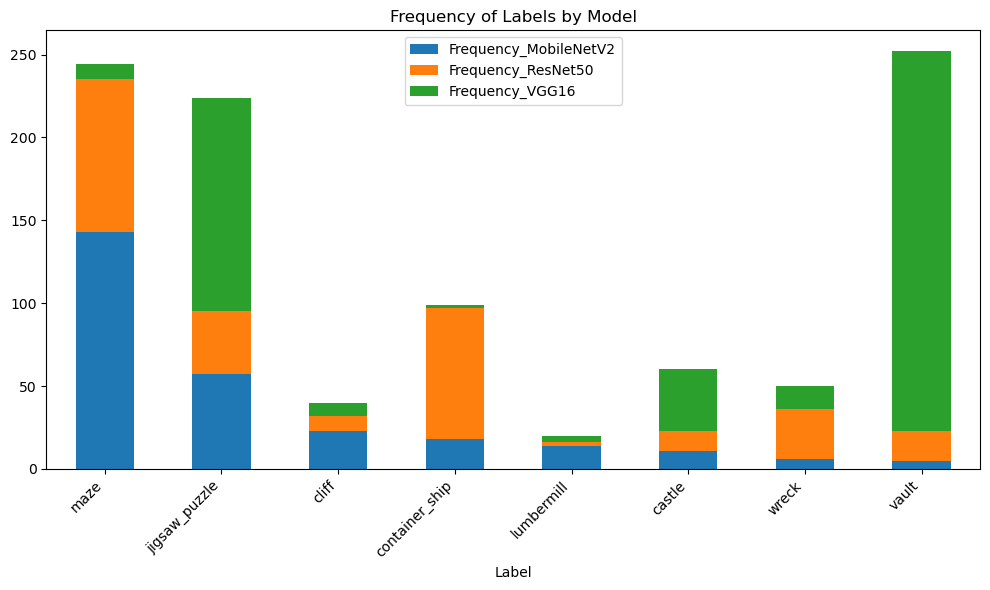

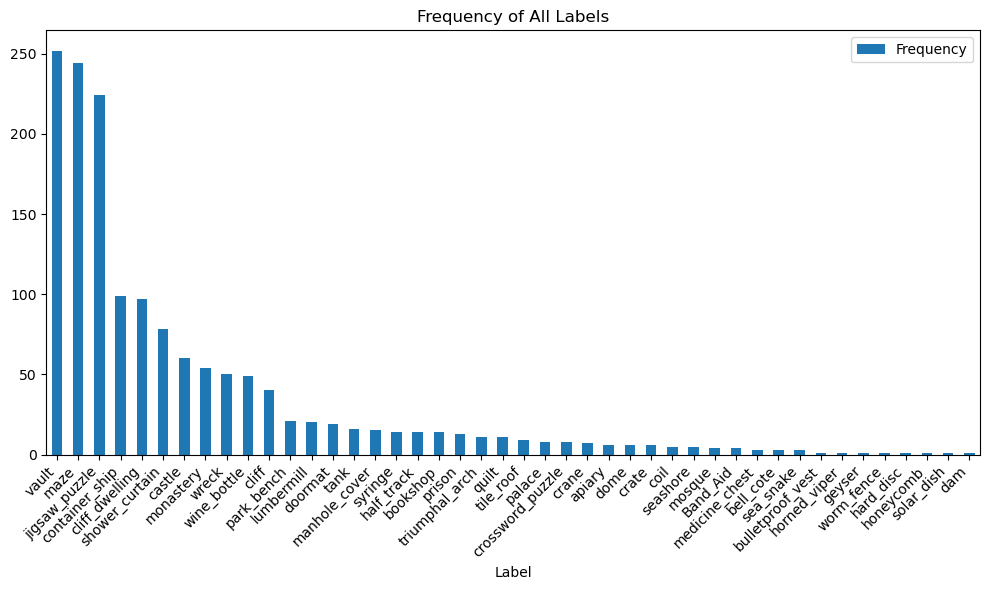

In [50]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import os

# Chemin vers le fichier CSV contenant les comparaisons des modèles
csv_path = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared\model_comparisons.csv'

# Étape 1: Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_path)

# Étape 2: Calculer la fréquence de chaque label, tous modèles confondus
# Concaténation des étiquettes de tous les modèles
all_labels = pd.concat([df['MobileNetV2_Label'], df['ResNet50_Label'], df['VGG16_Label']])
# Calcul des fréquences
label_frequencies = all_labels.value_counts().reset_index()
label_frequencies.columns = ['Label', 'Frequency']

# Sauvegarde du DataFrame des fréquences de labels
label_frequencies.to_csv(r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared\label_frequencies.csv', index=False)

# Étape 3: Calculer les fréquences de chaque label par modèle
# Calcul des fréquences pour chaque modèle
freq_mobile_net = df['MobileNetV2_Label'].value_counts().reset_index()
freq_res_net = df['ResNet50_Label'].value_counts().reset_index()
freq_vgg = df['VGG16_Label'].value_counts().reset_index()

# Renommer les colonnes
freq_mobile_net.columns = ['Label', 'Frequency_MobileNetV2']
freq_res_net.columns = ['Label', 'Frequency_ResNet50']
freq_vgg.columns = ['Label', 'Frequency_VGG16']

# Fusion des fréquences dans un seul DataFrame
freq_combined = pd.merge(pd.merge(freq_mobile_net, freq_res_net, on='Label'), freq_vgg, on='Label')

# Sauvegarde du DataFrame des fréquences par modèle
freq_combined.to_csv(r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared\model_label_frequencies.csv', index=False)

# Étape 4: Création et sauvegarde des histogrammes

# Histogramme des fréquences des labels par modèle
freq_combined.plot(x='Label', kind='bar', stacked=True, figsize=(10, 6), title="Frequency of Labels by Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared\labels_by_model_histogram.png')
plt.show()

# Histogramme des fréquences de tous les labels, indépendamment des modèles
label_frequencies.plot(kind='bar', x='Label', y='Frequency', figsize=(10, 6), title="Frequency of All Labels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\architecture_comapared\all_labels_histogram.png')
plt.show()

In [51]:
# Afficher le DataFrame des fréquences de labels pour MobileNetV2
print("Fréquences des labels prédits par MobileNetV2:")
print(freq_mobile_net)
print("\n")  # Ajoute un espace pour une meilleure lisibilité

# Afficher le DataFrame des fréquences de labels pour ResNet50
print("Fréquences des labels prédits par ResNet50:")
print(freq_res_net)
print("\n")  # Ajoute un espace pour une meilleure lisibilité

# Afficher le DataFrame des fréquences de labels pour VGG16
print("Fréquences des labels prédits par VGG16:")
print(freq_vgg)
print("\n")  # Ajoute un espace pour une meilleure lisibilité

# Afficher le DataFrame combiné des fréquences de labels pour tous les modèles
print("Fréquences combinées des labels pour tous les modèles:")
print(freq_combined)

Fréquences des labels prédits par MobileNetV2:
               Label  Frequency_MobileNetV2
0               maze                    143
1     cliff_dwelling                     92
2      jigsaw_puzzle                     57
3          monastery                     46
4              cliff                     23
5     container_ship                     18
6         lumbermill                     14
7         park_bench                     13
8             prison                     13
9             castle                     11
10  crossword_puzzle                      8
11           syringe                      7
12        half_track                      7
13             quilt                      7
14            apiary                      6
15             wreck                      6
16              coil                      5
17             vault                      5
18          seashore                      5
19          Band_Aid                      4
20         sea_snake         

In [53]:
'''
!pip install imageai --upgrade
!pip install opencv-python

import pandas as pd
from imageai.Detection import ObjectDetection
from pathlib import Path

# Initialize the YOLO model
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()  # Adjust if using a different model

# Ensure you have downloaded the YOLO model file and provide the correct path here
model_path = r"C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\yolo.h5"  # Update this path
detector.setModelPath(model_path)
detector.loadModel()

# Specify your folder path
folder_path = Path(r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\feat_image')

# List all images in the specified folder
image_paths = list(folder_path.glob('*.png'))

# Predict and collect labels for each image
results = []
for img_path in image_paths:
    output_path = str(img_path).replace(".png", "_detected.png")
    detections = detector.detectObjectsFromImage(input_image=str(img_path), output_image_path=output_path, minimum_percentage_probability=30)
    # Extract detected object names
    detected_objects = [d["name"] for d in detections]
    results.append({'image_name': img_path.name, 'Detected_Objects': detected_objects})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 379-380: truncated \UXXXXXXXX escape (720679035.py, line 38)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 599 samples in 0.002s...


C:\Users\d\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\d\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[t-SNE] Computed neighbors for 599 samples in 0.685s...
[t-SNE] Computed conditional probabilities for sample 599 / 599
[t-SNE] Mean sigma: 8.988502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.297150
[t-SNE] KL divergence after 300 iterations: 0.306817


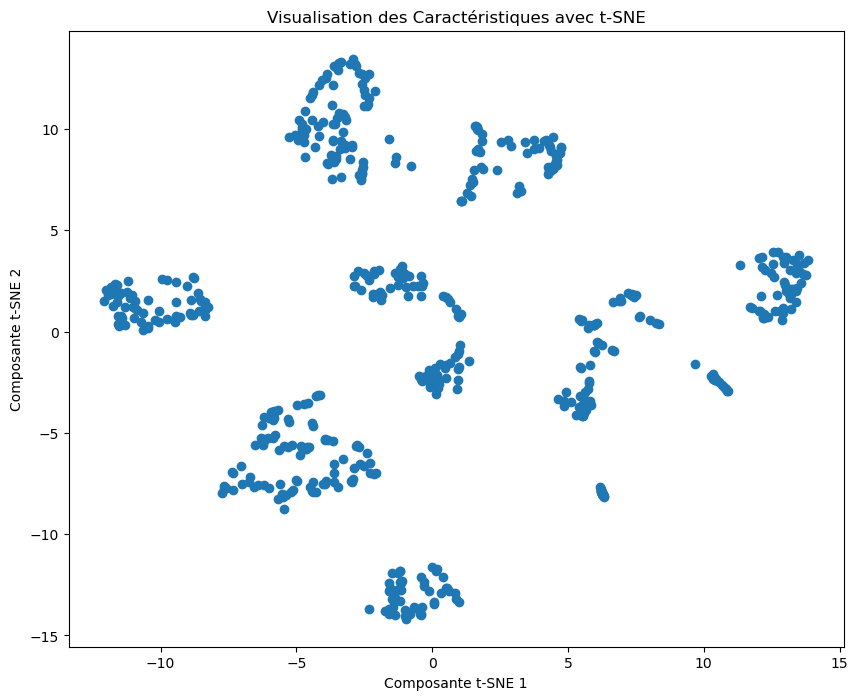

In [54]:
#Ce code a pour but de visualiser des données de haute dimension (caractéristiques extraites d'images, dans ce cas)
#dans un espace à deux dimensions pour faciliter leur compréhension et interprétation.
#Il utilise deux techniques principales : PCA (Analyse en Composantes Principales)
#et t-SNE (t-distributed Stochastic Neighbor Embedding). 

# Nécessaire pour l'installation des bibliothèques utilisées
# pour la visualisation et la réduction de dimension
!pip install matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# feats `feats` est le tableau NumPy de caractéristiques extraites des images

# PCA est utilisé en premier pour réduire la dimensionnalité à 50. Cela est fait principalement pour deux raisons :
# 1. Réduire le temps de calcul pour l'étape suivante (t-SNE), car t-SNE peut être très lent avec des données de haute dimension.
# 2. Éliminer le bruit potentiel présent dans les données, en conservant seulement les composantes les plus significatives.
pca = PCA(n_components=50)  # Réduction à 50 dimensions
feats_reduced = pca.fit_transform(feats)  # Application de PCA aux caractéristiques

# t-SNE est ensuite appliqué pour réduire les données de 50 dimensions à 2 dimensions, ce qui permet une visualisation en 2D.
# - `n_components=2` : Spécifie le nombre de dimensions cibles (2 pour une visualisation 2D).
# - `verbose=1` : Affiche des messages détaillés pour suivre la progression de l'algorithme.
# - `perplexity=40` : Un hyperparamètre pour t-SNE qui équilibre l'attention entre les distances locales et globales. 
#   La perplexité est souvent choisie dans une fourchette de 5 à 50.
# - `n_iter=300` : Le nombre d'itérations pour l'optimisation. Augmenter pour une convergence meilleure sur des ensembles de données complexes.
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feats_reduced)  # Application de t-SNE aux caractéristiques réduites par PCA

# Visualisation des résultats de t-SNE
plt.figure(figsize=(10, 8))  # Définit la taille de la figure pour la visualisation
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])  # Crée un graphique de dispersion des résultats t-SNE
plt.title('Visualisation des Caractéristiques avec t-SNE')  # Titre du graphique
plt.xlabel('Composante t-SNE 1')  # Étiquette pour l'axe des X
plt.ylabel('Composante t-SNE 2')  # Étiquette pour l'axe des Y
plt.show()  # Affiche la figure


In [55]:
print(image_order)
len(image_order)

['5.31542618799591_-4.25651310072667_5.31572562642395_-4.25696225836873.png', '5.3157794248817_-4.25655357519346_5.31622858252376_-4.25640385597944.png', '5.31587534563797_-4.256812539154709_5.31572562642395_-4.25696225836873.png', '5.31590173527235_-4.25544634420788_5.31620117370039_-4.25514690577984.png', '5.31622858252376_-4.25625413676542_5.31622858252376_-4.25640385597944.png', '5.31635947100455_-4.25640025176108_5.31665890943259_-4.25640025176108.png', '5.31652922802991_-4.25505573922224_5.31697838567197_-4.2555048968643.png', '5.31665033134245_-4.25544634420788_5.31620117370039_-4.25514690577984.png', '5.31695834786063_-4.25595109411902_5.31665890943259_-4.25640025176108.png', '5.31697838567197_-4.25595405450636_5.31697838567197_-4.2555048968643.png', '5.31716578078598_-4.25598143842804_5.3173155_-4.255682.png', '5.31744971851069_-4.25548707195944_5.31729999929667_-4.2559362296015.png', '5.31744971851069_-4.2557865103874795_5.31729999929667_-4.2559362296015.png', '5.317462261571

599

In [60]:
print(image_order_training)
len(image_order_training)

['5.31527646878189_-4.25666281994069_5.31572562642395_-4.25696225836873.png', '5.315575907209929_-4.25666281994069_5.31572562642395_-4.25696225836873.png', '5.315575907209929_-4.256812539154709_5.31572562642395_-4.25696225836873.png', '5.31572562642395_-4.257261696796769_5.31572562642395_-4.25696225836873.png', '5.31575201605833_-4.25514690577984_5.31620117370039_-4.25514690577984.png', '5.31587534563797_-4.25696225836873_5.31572562642395_-4.25696225836873.png', '5.31587534563797_-4.257261696796769_5.31572562642395_-4.25696225836873.png', '5.31592914409572_-4.25595469833738_5.31622858252376_-4.25640385597944.png', '5.31592914409572_-4.2561044175514_5.31622858252376_-4.25640385597944.png', '5.31592914409572_-4.2568530136215_5.31622858252376_-4.25640385597944.png', '5.316025064851989_-4.25651310072667_5.31572562642395_-4.25696225836873.png', '5.316025064851989_-4.25741141601079_5.31572562642395_-4.25696225836873.png', '5.316051454486369_-4.25469774813778_5.31620117370039_-4.2551469057798

2335

In [63]:
#Ce script crée un DataFrame pandas à partir d'un dictionnaire qui contient deux clés : 'image_name' et 'feat_index'
#Le script crée un DataFrame nommé forward_pass_df qui sert à associer chaque nom d'image traité à un indice correspondant
#à sa position ou à son emplacement dans l'ensemble des caractéristiques extraites (feats). 
#Ce DataFrame facilite le suivi et l'accès aux données de caractéristiques spécifiques à partir de noms d'images et vice versa.

#'image_name': image_order :Ces noms d'images correspondent aux images pour lesquelles les caractéristiques ont été extraites et stockées dans l'array feats.
#'feat_index': np.arange(len(image_order)) : Cet index correspond à la position de la caractéristique de l'image dans l'array feats.
#forward_pass_df = pd.DataFrame.from_dict({'image_name': image_order, 'feat_index': np.arange(len(image_order))})
#forward_pass_df.head() 

- Le script suivant a pour but de créer et d'utiliser un DataFrame pandas pour associer de manière organisée et accessible chaque image traitée à un indice spécifique. 
- Cet indice correspond à la position ou à l'emplacement des caractéristiques extraites de l'image dans un ensemble combiné de caractéristiques.

In [61]:
import pandas as pd
import numpy as np


# Combinaison de image_order et image_order_training en une seule liste
combined_image_order = image_order + image_order_training

# Créez un ensemble d'indices pour les caractéristiques combinées
# La longueur de combined_image_order devrait être égale à celle de combined_features
feat_indices = np.arange(len(combined_image_order))

# Construction du DataFrame
forward_pass_df = pd.DataFrame({
    'image_name': combined_image_order,
    'feat_index': feat_indices
})

# Affichage des premières lignes du DataFrame pour vérifier
forward_pass_df.head()


,image_name,feat_index
0,5.31542618799591_-4.25651310072667_5.315725626...,0
1,5.3157794248817_-4.25655357519346_5.3162285825...,1
2,5.31587534563797_-4.256812539154709_5.31572562...,2
3,5.31590173527235_-4.25544634420788_5.316201173...,3
4,5.31622858252376_-4.25625413676542_5.316228582...,4


In [62]:
forward_pass_df.shape

(2934, 2)

In [64]:
df_images

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin,is_train
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.057230,5.464147,-4.056781,518465.0,181.0,1,False
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
...,...,...,...,...,...,...,...,...,...
2929,6.859985734133001_-6.430992092734161_6.8598360...,6.859986,-6.430992,6.859836,-6.430842,611718.1,186.0,2,False
2930,6.86013545334702_-6.430992092734161_6.85983601...,6.860135,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2931,6.86028517256104_-6.430992092734161_6.85983601...,6.860285,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2932,6.85938685727692_-6.43084237352014_6.859836014...,6.859387,-6.430842,6.859836,-6.430842,611718.1,186.0,2,True


In [65]:
#Ce script fusionne deux DataFrames, df_images et forward_pass_df, 
#en utilisant la méthode pd.merge de pandas.
#L'opération de fusion est effectuée sur la colonne 'image_name', 
#qui doit être présente dans les deux DataFrames comme clé de fusion.

df_consumption = pd.merge(left=df_images, right=forward_pass_df, on='image_name')

# La dataframe forward_pass_df a 2934 lignes et df_images a 2934, so si on les fusionne, on obtiendra l'intersection des deux dataframe
# Et donc on aura 2934 lignes pour df_consumption

In [66]:
df_consumption

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin,is_train,feat_index
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1328
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.057230,5.464147,-4.056781,518465.0,181.0,1,False,187
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1339
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1343
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1356
...,...,...,...,...,...,...,...,...,...,...
2929,6.859985734133001_-6.430992092734161_6.8598360...,6.859986,-6.430992,6.859836,-6.430842,611718.1,186.0,2,False,307
2930,6.86013545334702_-6.430992092734161_6.85983601...,6.860135,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True,1797
2931,6.86028517256104_-6.430992092734161_6.85983601...,6.860285,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True,1800
2932,6.85938685727692_-6.43084237352014_6.859836014...,6.859387,-6.430842,6.859836,-6.430842,611718.1,186.0,2,True,1743


# Caractéristiques Agrégées

Nous agrégeons les caractéristiques des images par cluster et les sauvegardons dans results/pays/cnn

In [67]:
'''
import numpy as np
import os
import pickle

# Définition du chemin vers le dossier des pays
COUNTRIES_DIR = os.path.join(BASE_DIR, 'Data', 'countries')
# Nom du dossier pour le pays spécifique
country_dir = 'civ_2018'

# Grouper les données par latitude et longitude du cluster
group = df_consumption.groupby(['cluster_lat', 'cluster_lon'])
x = np.zeros((len(group), 4096))  # Initialiser un tableau pour les caractéristiques agrégées
cluster_list = []  # Liste correspondant aux clusters (lat, lon)

for i, g in enumerate(group):
    lat, lon = g[0]  # Coordonnées du cluster
    # Filtrer pour obtenir les images appartenant à ce cluster spécifique
    #L'objectif est de préparer un ensemble de données (im_sub) contenant uniquement les images d'un cluster spécifique,
    #puis d'initialiser un tableau (agg_feats) où seront stockées les caractéristiques extraites de ces images.
    #L'idée est d'ensuite remplir ce tableau avec les caractéristiques réelles extraites,
    #pour finalement calculer une représentation moyenne (ou autre forme d'agrégation) de ces caractéristiques
    im_sub = df_consumption[(df_consumption['cluster_lat'] == lat) & (df_consumption['cluster_lon'] == lon)].reset_index(drop=True)
    agg_feats = np.zeros((len(im_sub), 4096))  # Initialiser les caractéristiques agrégées pour ce cluster
    
    #filtre le DataFrame df_consumption pour ne conserver que les lignes (images) 
    #dont les coordonnées de cluster (cluster_lat pour la latitude et cluster_lon pour la longitude)
    #correspondent à celles du cluster actuel (lat, lon).
    #Cela signifie qu'on sélectionne toutes les images appartenant géographiquement à ce cluster spécifique.
    #Après le filtrage, .reset_index(drop=True) est utilisé pour réinitialiser l'index du nouveau DataFrame résultant (im_sub).
    #L'option drop=True est utilisée pour ne pas conserver l'ancien index en tant que colonne dans le DataFrame; 
    #il est simplement abandonné. Cela assure que l'index du DataFrame im_sub commence à 0 et augmente de manière séquentielle, 
    #ce qui facilite l'accès par indexation à ses lignes par la suite.
    
    # Calcule des caractéristiques agrégées pour chaque image dans le cluster
    ## for j, d in im_sub.iterrows() Cette boucle itère sur toutes les lignes (images) du DataFrame im_sub,
    # qui contient les images appartenant à un cluster spécifique. Pour chaque itération,
    #j est l'indice de la ligne (image) dans im_sub, et d est la série (ligne) elle-même,
    #contenant toutes les informations de cette image.
    for j, d in im_sub.iterrows():
        agg_feats[j, :] = feats[d.feat_index]
    # Moyenne des caractéristiques pour obtenir une seule caractéristique par cluster
    #agg_feats.mean(axis=0) : Une fois toutes les caractéristiques des images du cluster copiées dans agg_feats,
    #cette ligne calcule la moyenne de ces caractéristiques sur l'axe 0 (c'est-à-dire colonne par colonne).
    #Le résultat est un vecteur unique de caractéristiques qui représente 
    #la moyenne des caractéristiques de toutes les images dans le cluster.
    agg_feats = agg_feats.mean(axis=0)
    
    x[i, :] = agg_feats  # Assigner les caractéristiques agrégées au tableau global
    cluster_list.append([lat, lon])  # Ajouter les coordonnées du cluster à la liste
'''

"\nimport numpy as np\nimport os\nimport pickle\n\n# Définition du chemin vers le dossier des pays\nCOUNTRIES_DIR = os.path.join(BASE_DIR, 'Data', 'countries')\n# Nom du dossier pour le pays spécifique\ncountry_dir = 'civ_2018'\n\n# Grouper les données par latitude et longitude du cluster\ngroup = df_consumption.groupby(['cluster_lat', 'cluster_lon'])\nx = np.zeros((len(group), 4096))  # Initialiser un tableau pour les caractéristiques agrégées\ncluster_list = []  # Liste correspondant aux clusters (lat, lon)\n\nfor i, g in enumerate(group):\n    lat, lon = g[0]  # Coordonnées du cluster\n    # Filtrer pour obtenir les images appartenant à ce cluster spécifique\n    #L'objectif est de préparer un ensemble de données (im_sub) contenant uniquement les images d'un cluster spécifique,\n    #puis d'initialiser un tableau (agg_feats) où seront stockées les caractéristiques extraites de ces images.\n    #L'idée est d'ensuite remplir ce tableau avec les caractéristiques réelles extraites,\n   

In [75]:
'''erreur avec ce code
import numpy as np
import os
import pandas as pd


for i, (coords, grp) in enumerate(group):
    lat, lon = coords  # Coordonnées du cluster
    agg_feats = np.zeros((len(grp), 4096))  # Initialiser les caractéristiques agrégées pour ce cluster
    
    for j, row in grp.iterrows():
        image_name = row['image_name']
        # Trouvez l'indice de la caractéristique pour l'image dans forward_pass_df
        feat_index = forward_pass_df.loc[forward_pass_df['image_name'] == image_name, 'feat_index'].values[0]

        # Instructions d'impression pour le débogage
        print(f"Traitement de l'image {image_name} avec feat_index {feat_index}")
        print(f"Taille de agg_feats: {agg_feats.shape}")
        print(f"Taille de combined_features: {combined_features.shape}")
        print(f"Accès à l'index {j} de agg_feats et à l'index {feat_index} de combined_features")

        # Vérification pour éviter l'erreur
        if feat_index >= combined_features.shape[0]:
            print(f"Erreur: feat_index {feat_index} est hors limites pour combined_features.")
        else:
            agg_feats[j, :] = combined_features[feat_index]

    # Calcul de la moyenne des caractéristiques pour obtenir une caractéristique représentative du cluster
    agg_feats = agg_feats.mean(axis=0)
    x[i, :] = agg_feats
    cluster_list.append([lat, lon])
'''

'erreur avec ce code\nimport numpy as np\nimport os\nimport pandas as pd\n\n\nfor i, (coords, grp) in enumerate(group):\n    lat, lon = coords  # Coordonnées du cluster\n    agg_feats = np.zeros((len(grp), 4096))  # Initialiser les caractéristiques agrégées pour ce cluster\n    \n    for j, row in grp.iterrows():\n        image_name = row[\'image_name\']\n        # Trouvez l\'indice de la caractéristique pour l\'image dans forward_pass_df\n        feat_index = forward_pass_df.loc[forward_pass_df[\'image_name\'] == image_name, \'feat_index\'].values[0]\n\n        # Instructions d\'impression pour le débogage\n        print(f"Traitement de l\'image {image_name} avec feat_index {feat_index}")\n        print(f"Taille de agg_feats: {agg_feats.shape}")\n        print(f"Taille de combined_features: {combined_features.shape}")\n        print(f"Accès à l\'index {j} de agg_feats et à l\'index {feat_index} de combined_features")\n\n        # Vérification pour éviter l\'erreur\n        if feat_ind

In [74]:
''' (erreur avec ces codes)
# Importation des bibliothèques nécessaires
import numpy as np
import os
import pickle
import pandas as pd

# Configuration des chemins de base pour accéder aux données
# BASE_DIR est le répertoire racine où se trouvent toutes les données du projet
# COUNTRIES_DIR pointe vers le sous-dossier contenant les données spécifiques aux différents pays
# country_dir spécifie le dossier pour un pays et une année donnés, ici "civ_2018" pour la Côte d'Ivoire en 2018
COUNTRIES_DIR = os.path.join(BASE_DIR, 'Data', 'countries')
country_dir = 'civ_2018'

# df_consumption est un DataFrame préalablement défini qui contient des données telles que
# la latitude et la longitude de clusters ('cluster_lat', 'cluster_lon') et le nom de l'image ('image_name')
# Ces données sont utilisées pour identifier les images par cluster géographique
group = df_consumption.groupby(['cluster_lat', 'cluster_lon'])

# Initialisation d'un tableau numpy pour stocker les caractéristiques agrégées de chaque cluster
# La dimension est définie par le nombre de clusters uniques et la taille des vecteurs de caractéristiques (4096)
x = np.zeros((len(group), 4096))

# Initialisation d'une liste pour enregistrer les coordonnées de chaque cluster traité
cluster_list = []

# Boucle sur chaque cluster identifié par ses coordonnées géographiques
for i, (coords, grp) in enumerate(group):
    lat, lon = coords  # Extraction des coordonnées du cluster
    # Initialisation d'un tableau pour stocker temporairement les caractéristiques des images du cluster
    agg_feats = np.zeros((len(grp), 4096))
    
    # Boucle sur chaque image appartenant au cluster actuel
    for j, row in grp.iterrows():
        # Extraction du nom de l'image
        image_name = row['image_name']
        # Recherche de l'indice de la caractéristique de l'image dans forward_pass_df
        # forward_pass_df associe chaque nom d'image à un indice dans l'ensemble des caractéristiques combinées
        feat_index = forward_pass_df.loc[forward_pass_df['image_name'] == image_name, 'feat_index'].values[0]
        # Extraction de la caractéristique correspondante à partir de l'ensemble combiné et stockage dans agg_feats
        agg_feats[j, :] = combined_features[feat_index]
    
    # Agrégation des caractéristiques du cluster en calculant la moyenne des vecteurs de caractéristiques
    agg_feats = agg_feats.mean(axis=0)
    # Assignation des caractéristiques agrégées au tableau global x
    x[i, :] = agg_feats
    # Enregistrement des coordonnées du cluster dans la liste cluster_list
    cluster_list.append([lat, lon])

# À ce stade, x contient les caractéristiques agrégées pour chaque cluster, et cluster_list contient leurs coordonnées.
# Ces données peuvent être utilisées pour des analyses ultérieures ou comme entrée pour des modèles de machine learning.
'''

' (erreur avec ces codes)\n# Importation des bibliothèques nécessaires\nimport numpy as np\nimport os\nimport pickle\nimport pandas as pd\n\n# Configuration des chemins de base pour accéder aux données\n# BASE_DIR est le répertoire racine où se trouvent toutes les données du projet\n# COUNTRIES_DIR pointe vers le sous-dossier contenant les données spécifiques aux différents pays\n# country_dir spécifie le dossier pour un pays et une année donnés, ici "civ_2018" pour la Côte d\'Ivoire en 2018\nCOUNTRIES_DIR = os.path.join(BASE_DIR, \'Data\', \'countries\')\ncountry_dir = \'civ_2018\'\n\n# df_consumption est un DataFrame préalablement défini qui contient des données telles que\n# la latitude et la longitude de clusters (\'cluster_lat\', \'cluster_lon\') et le nom de l\'image (\'image_name\')\n# Ces données sont utilisées pour identifier les images par cluster géographique\ngroup = df_consumption.groupby([\'cluster_lat\', \'cluster_lon\'])\n\n# Initialisation d\'un tableau numpy pour stoc

In [72]:
for i, (coords, grp) in enumerate(group):
    lat, lon = coords
    # Réinitialisez l'indice de grp pour s'assurer qu'il commence à 0
    grp = grp.reset_index(drop=True)
    agg_feats = np.zeros((len(grp), 4096))
    
    for j, row in grp.iterrows():
        image_name = row['image_name']
        feat_index = forward_pass_df.loc[forward_pass_df['image_name'] == image_name, 'feat_index'].values[0]

        # Maintenant, 'j' devrait correctement indexer de 0 à len(grp)-1
        agg_feats[j, :] = combined_features[feat_index]

    agg_feats = agg_feats.mean(axis=0)
    x[i, :] = agg_feats
    cluster_list.append([lat, lon])


In [73]:
print(combined_features.shape)

(2934, 4096)


In [76]:
print(forward_pass_df['feat_index'].max())  # Cela devrait être inférieur à la taille de combined_features

2933


In [77]:
# Chemin de sauvegarde pour les résultats
save_dir = os.path.join(RESULTS_DIR, country_dir, 'cnn')
os.makedirs(save_dir, exist_ok=True)  # Créer le dossier s'il n'existe pas
np.save(os.path.join(save_dir, 'cluster_feats.npy'), x)  # Sauvegarder les caractéristiques agrégées

#cette ligne de code prend la liste cluster_list, qui contient des informations sur les clusters, 
#et la sauvegarde dans un fichier appelé 'cluster_order.pkl' dans le répertoire spécifié par save_dir.
#Ce fichier peut ensuite être chargé (ou "unpickled") dans un autre script
#ou à une date ultérieure pour récupérer l'état exact de cluster_list au moment de la sauvegarde.
pickle.dump(cluster_list, open(os.path.join(save_dir, 'cluster_order.pkl'), 'wb'))  # Sauvegarder l'ordre des clusters

In [78]:
agg_feats

array([-0.409882  ,  0.46132919, -0.16399848, ...,  0.61042985,
        0.4337463 , -0.87806427])

In [79]:
agg_feats.shape

(4096,)

In [80]:
df_consumption

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin,is_train,feat_index
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1328
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.057230,5.464147,-4.056781,518465.0,181.0,1,False,187
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1339
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1343
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True,1356
...,...,...,...,...,...,...,...,...,...,...
2929,6.859985734133001_-6.430992092734161_6.8598360...,6.859986,-6.430992,6.859836,-6.430842,611718.1,186.0,2,False,307
2930,6.86013545334702_-6.430992092734161_6.85983601...,6.860135,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True,1797
2931,6.86028517256104_-6.430992092734161_6.85983601...,6.860285,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True,1800
2932,6.85938685727692_-6.43084237352014_6.859836014...,6.859387,-6.430842,6.859836,-6.430842,611718.1,186.0,2,True,1743
